In [14]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv('clientes_compras.csv')

In [16]:
df.head()

,idade,renda,tempo_site,numero_visitas,comprou
0,56,8882,42,5,0
1,69,3906,56,19,0
2,46,5086,36,11,0
3,32,15503,20,12,0
4,60,10152,4,10,0


In [17]:
# Separando features e target
X = df[['idade', 'renda', 'tempo_site', 'numero_visitas']]
y = df['comprou']

# Dividindo em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando e treinando a árvore de decisão
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [18]:
# Fazendo previsões
y_pred = dt.predict(X_test)

# Avaliando o modelo
print("\nAcurácia do modelo:", accuracy_score(y_test, y_pred))
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))


Acurácia do modelo: 1.0

Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       174
           1       1.00      1.00      1.00        26

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



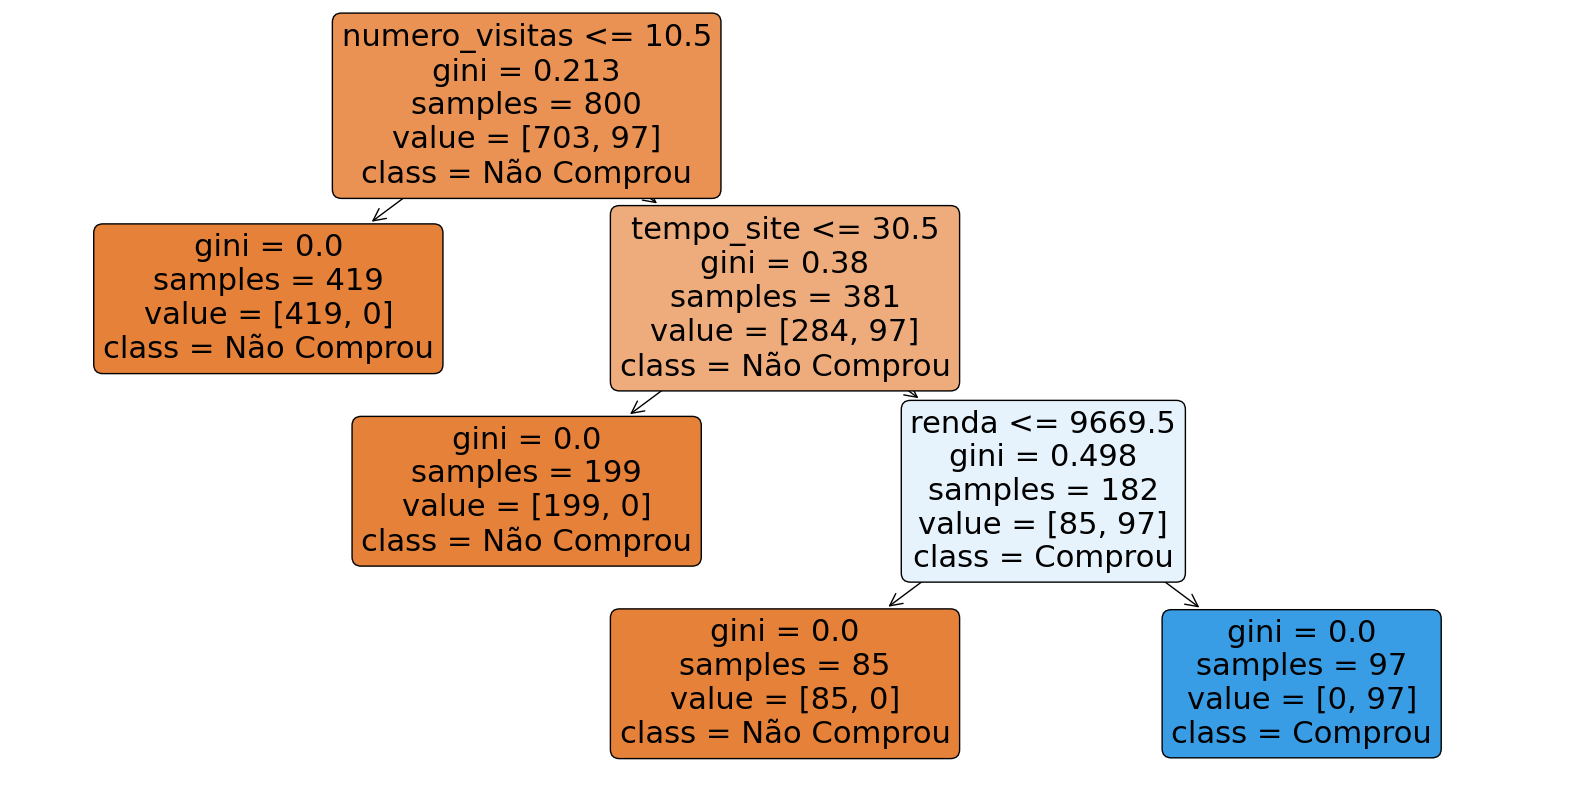

In [19]:
# Visualizando a árvore de decisão
plt.figure(figsize=(20,10))
plot_tree(dt, 
          feature_names=['idade', 'renda', 'tempo_site', 'numero_visitas'],
          class_names=['Não Comprou', 'Comprou'],
          filled=True, 
          rounded=True)
plt.show()

In [20]:
# Exemplo de como usar o modelo para fazer previsões
print("\nExemplos de previsões:")
exemplos = pd.DataFrame({
    'idade': [25, 45, 35],
    'renda': [5000, 15000, 8000],
    'tempo_site': [15, 45, 25],
    'numero_visitas': [5, 15, 8]
})


Exemplos de previsões:


In [21]:
previsoes = dt.predict(exemplos)
print("\nPrevisões para os exemplos:")
for i, previsao in enumerate(previsoes):
    print(f"Cliente {i+1}: {'Comprou' if previsao == 1 else 'Não Comprou'}")


Previsões para os exemplos:
Cliente 1: Não Comprou
Cliente 2: Comprou
Cliente 3: Não Comprou


In [22]:
# Explicando a importância das features
importancias = pd.DataFrame({
    'feature': X.columns,
    'importancia': dt.feature_importances_
}).sort_values('importancia', ascending=False)

print("\nImportância das features:")
print(importancias)


Importância das features:
          feature  importancia
1           renda     0.531474
2      tempo_site     0.316784
3  numero_visitas     0.151742
0           idade     0.000000


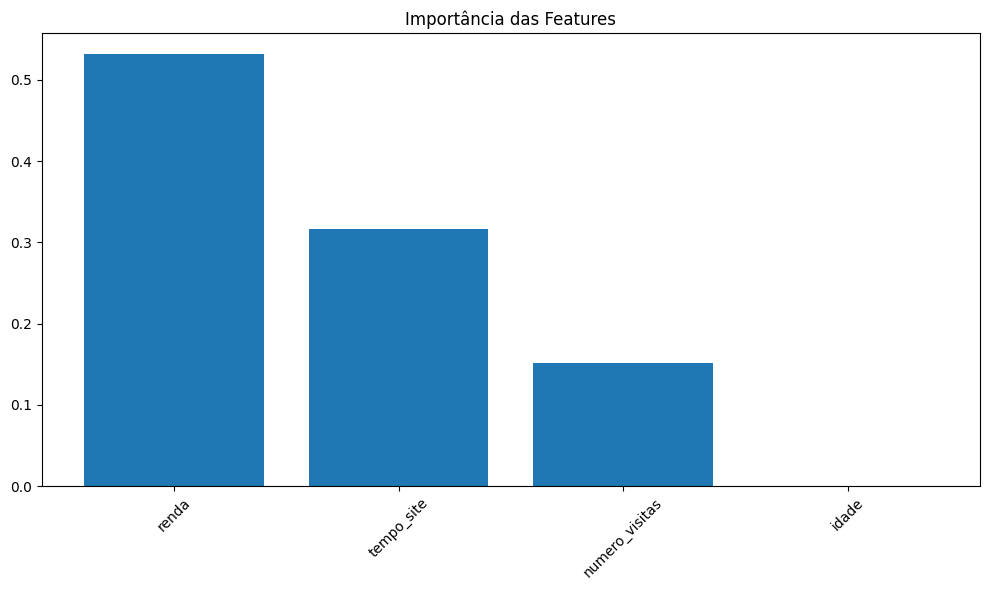

In [23]:
# Visualizando a importância das features
plt.figure(figsize=(10, 6))
plt.bar(importancias['feature'], importancias['importancia'])
plt.title('Importância das Features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()